<a href="https://colab.research.google.com/github/Achuna/Climate-Data-UMBC-Summer-Research/blob/master/Notebooks/Bayesian_Network_Modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Metadata

**DESCRIPTION**

The data represents the **variance** of the given column

Variance is a measure of how spread out a data set is (Some of it is negative but we can disregard this format)

Time lag is a **shift** in what data points we are looking at.

Each time step is a month (~40 years)

---


**MSL (Mean Sea Level)**

msl 01- Antarctica

msl 02  - North Atlantic oscillation

msl 03 - Southeast Pacific

msl 04 - North Pacific

msl 06 -  Southwest Pacific

msl 07  -  Siberia


---



 **Si10 (Wind Speed 10 meters)**


si10 00 -  Antarctic circumpolar current

si10 01 -  South Pacific

si10 04  -  Tropical eastern Pacific

si10 05  - Tropical central Pacific

si10 06  -  North Atlantic subtropical gyre

si10 07  -  North Pacific subtropical gyre



---

**SST (Sea Surface Temperature)**

sst 00  -  Equatorial central Pacific (ENSO)

sst 03  -  Equatorial eastern Pacific (ENSO)

sst 04  -  Western coast of North America

sst 05  -  North Pacific (PDO)

sst 06  -  Kuroshio extension

sst 07  -  Western coast of South America



---

**T2M (Temperature at 2 meters)**

t2m 02  -  Antarctica

t2m 03   -  Arctic

t2m 04   -  North America

t2m 06   -  Siberia

t2m 07   -  Europe

t2m 08   -  Greenland

# Data Preperation

In [0]:
import os
from google.colab import files
import pandas as pd
import numpy as np

files.upload() #Upload files locally from computer into project

df = pd.DataFrame([]) #Initialize an empty dataframe

#Loop through files in the project's directory
for file in os.listdir('/content'):
  try:
    f = open(file)
    columnName = file[file.rfind('_')+1 : len(file)] #get column name from file name
    
    array = f.read().split("\n") #read and split lines into an array
    
    #delete any empty values (Prevents errors when casting data to floats)
    del array[array.index('')]
    
    # Using DataFrame.insert() to add a column 
    df.insert(0, columnName, array) #insert new column at the beginning 
    
    f.close() #Close file for safe keeping
  except:
    print("")
    
df = df.astype('float') #Convert dataframe values to floats for later calculations

df #print dataframe

,msl-07,msl-24,msl-00,msl-01,msl-09
0,0.260658,2.458362,-0.667308,-0.499200,1.125802
1,0.916423,1.381709,-0.592653,-0.359078,-0.683581
2,-0.881304,0.915211,-0.579885,-1.042020,-1.071559
3,-0.947577,0.788872,-0.600692,-0.844485,0.439136
4,0.484418,0.133527,-0.497346,-0.972610,-0.573276
5,0.375301,-0.446150,-0.370552,-1.497780,-0.382764
6,0.053126,-0.027482,-0.330698,-2.333303,0.076015
7,0.166169,0.637518,-0.619904,-0.509094,-0.378653
8,0.317969,-0.271053,-0.489942,-0.641116,-0.291093
9,0.003307,0.816314,-0.632057,-0.157565,-0.861489


# Bayesian Network Learning

**Challenges Faced**


1) In order to make bayesian inferences, I need to create a network structure where each node holds a conditional probabilty distribution (CPD)

2) Creating the bayesian model requires me to learn the causal relationships between the variables to create a network and make predictions

---

Do I have to end up converting the climate data into some sort of probabilty distribution/table in order to make causal inferences? The bayesian model initially requires a network structure where each node is a CPD to make inferences


**Research Findings**


"To learn the structure
and the parameters for the Bayesian networks from a set
of data, we should search the space(s) of all possible
graph representations, and find out which structure is
most likely to produce our data. If we have a scoring
function (or likelihood function) which can determine
the structure and parameter likelihood from the data,
then the problem is to find the highest score (maximum likelihood) structure among all the possible representations.""


Granger causality vs. dynamic Bayesian network inference:
a comparative study

(Cunlu Zou and Jianfeng Feng)

---


**Approach**

Useful Articles:

[Learning Bayesian Network from Data](http://robotics.stanford.edu/~koller/NIPStut01/tut6.pdf)

[Learning Bayesian Network Model Structure from Data](https://www.cs.cmu.edu/~dmarg/Papers/PhD-Thesis-Margaritis.pdf) 

**Steps:** Structure Learning, Parameter Learning, Inference Making

In [0]:
!pip install pgmpy #install the pgmpy library
!pip install graphviz #for network visualizations

## Score-based Structure Learning

In [0]:
data = df[0:100] #only looking at first 100 rows to minimize computation time for now
data

,msl-01,t2m-07,sst-13,si10-20
0,-0.499200,0.774216,0.109273,0.022619
1,-0.359078,-0.176478,-0.264073,2.705268
2,-1.042020,-1.190285,-0.287171,-0.686304
3,-0.844485,0.628816,-0.656911,-0.355621
4,-0.972610,-1.752389,-0.746113,-0.048683
5,-1.497780,-0.469959,-0.522640,0.047612
6,-2.333303,-0.310096,-0.437077,0.501210
7,-0.509094,-0.863965,-0.233569,-0.495057
8,-0.641116,-1.364164,-0.123470,-0.021234
9,-0.157565,-0.223483,0.293815,0.268508


[('t2m-07', 'msl-01'), ('t2m-07', 'si10-20'), ('si10-20', 'sst-13')]


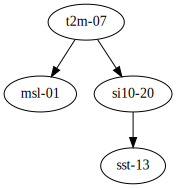

In [0]:
from pgmpy.estimators import BdeuScore, K2Score, BicScore
from pgmpy.models import BayesianModel
from pgmpy.estimators import HillClimbSearch
from graphviz import Digraph #directed graph (good for bayesian networks)


bdeu = BdeuScore(data, equivalent_sample_size=5)

#single edge manipulations to increase score
hc = HillClimbSearch(data, scoring_method=bdeu) 

best_model = hc.estimate()
print(best_model.edges())

###Print out Bayesian Network###

edges = best_model.edges() #store connections in a variable

g = Digraph('Climate', filename='Climate_Model') #name, filename

#Create connections given the edges 
for i in range(0, len(edges)): #loop through array of tuples and extract the parents and childs
  parent = edges[i][0]
  child = edges[i][1]
  g.edge(parent, child) #create edge from parent --> child
    
g #print network

## Bayesian Parameter Learning

In [0]:
from pgmpy.estimators import BayesianEstimator #Using bayesian estimator for creating CPDs

#prior type defines pseudo state counts making states equiprobable. 
#after the priors are defined, the actual data is added for normalization

#Estimate CPDs for each node and fit them into the model
best_model.fit(data, estimator = BayesianEstimator, prior_type="BDeu") #other common prior type: K2 

#print out CPDs
for cpd in best_model.get_cpds():
  print(cpd)

+---------------------+-----------------------+-----------------------+------------------------+------------------------+-----------------------+-----------------------+-----------------------+-----------------------+----------------------+-----------------------+-----------------------+-----------------------+-----------------------+-----------------------+-----------------------+-----------------------+------------------------+-----------------------+------------------------+-----------------------+-----------------------+------------------------+-----------------------+------------------------+-----------------------+------------------------+-----------------------+-----------------------+-----------------------+-----------------------+-----------------------+-----------------------+-----------------------+-----------------------+-----------------------+-----------------------+-----------------------+-----------------------+-----------------------+-----------------------+-----------

## Score-based Structure Learning (w/ Bins)

**Attempted Solution to reduce computation time**

---



Originally the algorthm for parameter estimations treated all different data points as a seperate state of the variable. 

Here, I am defining a range of bins the data can be allocated in to reduce the amount of calculations for conditional probability distributions

In [0]:
#Returns an array of tuples, each consisting of two numeric values
#The tuples functions as subset ranges of values dividing the overarching range into N bins

#Parameters: low - lowest value in column, high - highest value in column
#nBins - amount of bins the range will be divided into (default = 5 bins)
#giveValue - gives the lowest and highest bin values some give to avoid NaN of float numbers (default = 0.1)
def createBins(low, high, nbins=5, giveValue = 0.1):
  bins = []
  step = 0
  #Defining the step value (subset ranges length)
  if(low < 0):
    step = abs(low) / nbins + high / nbins
  else:
    step = high / nbins
  #Loop through N bins and create the ranges
  for i in range(0, nbins):
    bins.append([low, low+step])
    low = low+step
  #give lowest and highest bin values some give to avoid NaN of float numbers  
  bins[0][0] -= giveValue
  bins[len(bins)-1][1] += giveValue
  return bins

#given bins, this will assign the value to the index of the bin it belongs in
def assignBin(bins, value):
  for i in range(0, len(bins)):
    low = bins[i][0]
    high = bins[i][1]
    if(value >= low and value <= high):
      return i

    
data = df
 
columns = list(data) 
for i in columns: 
    maximum = data[i].max()
    minimum = data[i].min()
    bins = createBins(minimum, maximum, 50) #Creating an array of bins for column
    for j in range(0, len(data[i])): 
      data[i][j] = assignBin(bins, data[i][j]) #assigning new bin based on value of data 

data

,msl-01,t2m-07,sst-13,si10-20
0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0


[('t2m-07', 'si10-20'), ('si10-20', 'msl-01'), ('si10-20', 'sst-13')]


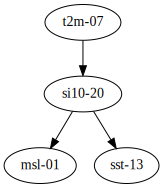

In [0]:
from pgmpy.estimators import BdeuScore, K2Score, BicScore
from pgmpy.models import BayesianModel
from pgmpy.estimators import HillClimbSearch
from graphviz import Digraph #directed graph (good for bayesian networks)


bdeu = BdeuScore(data, equivalent_sample_size=5)

#single edge manipulations to increase score
hc = HillClimbSearch(data, scoring_method=bdeu) 

best_model = hc.estimate()
print(best_model.edges())

###Print out Bayesian Network

edges = best_model.edges() #store connections in a variable

g = Digraph('Climate', filename='Climate_Model') #name, filename

#Create connections given the edges 
for i in range(0, len(edges)):
  parent = edges[i][0]
  child = edges[i][1]
  g.edge(parent, child)
    
g

## Bayesian Paramater Learning (w/ Bins)

In [0]:
from pgmpy.estimators import BayesianEstimator

#Estimate CPDs for each node
best_model.fit(data, estimator=BayesianEstimator, prior_type="BDeu") 

#print out CPDs
for cpd in best_model.get_cpds():
  print(cpd)

+--------------+-----------------------+-----------------------+-----------------------+------------------------+----------------------+----------------------+----------------------+----------------------+----------------------+
| si10-20      | si10-20(0.0)          | si10-20(1.0)          | si10-20(2.0)          | si10-20(5.0)           | si10-20(9.0)         | si10-20(12.0)        | si10-20(16.0)        | si10-20(32.0)        | si10-20(49.0)        |
+--------------+-----------------------+-----------------------+-----------------------+------------------------+----------------------+----------------------+----------------------+----------------------+----------------------+
| msl-01(0.0)  | 0.8260108245781593    | 0.5382634289919059    | 0.11456335506968414   | 0.061144872083427115   | 0.10359231411862992  | 0.024154589371980686 | 0.003003003003003003 | 0.021001221001221003 | 0.11111111111111112  |
+--------------+-----------------------+-----------------------+--------------------

**Errors Found**



---

When creating bins you are essentially creating a completly new dataset to run structured learning on. Although the bin approach reduce the computational time, this approach does not stay true to the actual data reducing the accuracy of the model.

# Bayesian Network Learning (w/ partitions)



**Issues with the bin approach**

When creating bins you are essentially creating a completly new dataset to run structured learning on. Although the bin approach reduce the computational time, this approach does not stay true to the actual data reducing the accuracy of the model.

**Possible Solution**

In order to stay true to the data provided, I preposed partitioning the dataframe into smaller pieces and preforming the HillClimb Search algorthm to find the best Bayesian network models. After finding the best bayesian network models for partition, I compare the scores and use the model with the highest score.

---

The goal here was to preform the HillClimb Search algorithm on smaller dataframes to increase the computation speed.

In [0]:
def createPartitions(data, nParts = 12):
  arrayOfDfs = []
  low = 0
  step = len(data) / nParts
  step = math.floor(step) #round down
  for i in range(0, nParts):
    arrayOfDfs.append(data[low:low+step])
    low+=step
  return arrayOfDfs

#store dataframe chuncks into an array
dataframes = createPartitions(data, 12)

In [0]:
from pgmpy.estimators import BdeuScore, K2Score, BicScore
from pgmpy.models import BayesianModel
from pgmpy.estimators import HillClimbSearch
from graphviz import Digraph #directed graph (good for bayesian networks)


bdeu = BdeuScore(data, equivalent_sample_size=5)

bestModels = []

#Preform the search on the dataframes and print out the best models
for df in dataframes:
  hc = HillClimbSearch(df, scoring_method=bdeu) 
  best_model = hc.estimate()
  score = bdeu.score(best_model)
  bestModels.append((best_model, score))
  print(best_model.edges())

**Problems with this approach**

Preform a search on partitions of the data reduced the model's accuracy and there was no imporovment in the computational speed. 

# Making Inferences

In [0]:
from pgmpy.inference import VariableElimination

#avoids computing the Joint Distribution by doing marginalization over much smaller factors
infer = VariableElimination(best_model) 


#making inference 

#print(infer.query(['msl-01']) ['msl-01'])
#print(infer.query(['msl-01'], evidence={'sst-13': 50}) ['msl-01'])

print(infer.map_query(['msl-01'], evidence={'sst-13': 2}))



{'msl-01': 19}


/usr/local/lib/python3.6/dist-packages/pgmpy/factors/discrete/DiscreteFactor.py:586: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  phi.values = phi.values[slice_]
/usr/local/lib/python3.6/dist-packages/pgmpy/factors/discrete/DiscreteFactor.py:598: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  phi1.values = phi1.values[slice_]


With the Bayesian model's structure and parameters defined we can do MAP inferences by providing evidence and get the probability of our target feature value

# *Constraint-based Structure Learning

Still in progress

**Issues Faced**

Error commonly faced when doing conditional indenpendence tests: 
```
/usr/local/lib/python3.6/dist-packages/pgmpy/estimators/base.py:209: UserWarning: Insufficient data for testing B _|_ H | []. At least 405.0 samples recommended, 10 present.
  "At least {0} samples recommended, {1} present.".format(5 * num_params, len(self.data)))
/usr/local/lib/python3.6/dist-packages/pgmpy/estimators/base.py:209: UserWarning: Insufficient data for testing B _|_ E | []. At least 405.0 samples recommended, 10 present.
  "At least {0} samples recommended, {1} present.".format(5 * num_params, len(self.data)))
```

**Reasons for this Error**

Each variable has a unique set of data point values not states. Using the constraint based approach depends on having enough occurence of a state to determine its independencies.

In [0]:
from pgmpy.estimators import ConstraintBasedEstimator

est = ConstraintBasedEstimator(data)

model = BayesianModel(est.estimate(significance_level=0.01).edges())

# *Hybrid Bayesian Structure Learning

Still in progress

In [0]:
data

In [0]:
from pgmpy.estimators import ConstraintBasedEstimator, HillClimbSearch
from pgmpy.estimators import BdeuScore, K2Score, BicScore #import scoring functions
from pgmpy.models import BayesianModel

#Create undirected graph skeleton
constraintEstimate = ConstraintBasedEstimator(data)

skeleton, seperating_sets = constraintEstimate.estimate_skeleton(significance_level=0.01)

print("Part 1) Skeleton: ", skeleton.edges())

# use hill climb search to orient the edges:
hc = HillClimbSearch(data, scoring_method=BdeuScore(data))
model = hc.estimate()
print("Part 2) Model:    ", model.edges())


###Create Bayesian Network####


edges = model.edges() #store connections in a variable

g = Digraph('Climate', filename='Hybrid_Climate_Model') #name, filename

#Create connections given the edges 
for i in range(0, len(edges)):
  parent = edges[i][0]
  child = edges[i][1]
  g.edge(parent, child)
    
g

**Issues with Hybrid Learning**

This approach is extremely useful for efficently and accuatley creating a belief network. It starts with a skeleton model and uses a score-based approach to create the network instead of starting with a completely undirected graphical network. 

This being said, creating the skeleton requires us to identify the independencies amongst variables using the constraint-based approch. As stated, we were getting errors with the sample size.

# Conclusion

Using Bayesian Network models allowed us to identify the probability distribution among variables and make inferences from the data. We have to remember that the Bayesian network model is a static model for determining conditional probability distributions NOT causality. The reason why it took so long to create CPDs from the data is because we were given a time series not a static set of data points. 

---



In order to find causality and effiently use this data, we must extend bayesian networks with a temporal model...Dynamic Bayesian Networks